## Homework 4
## Machine Learning 598 
#### Rommel Fernandes 
#### Ali Alshamali
#### Shujian Hao

In [223]:
import pandas as pd
from matplotlib import pyplot as plt   #import key modules 
from sklearn.tree import export_graphviz
import numpy as np
import seaborn as sns

### Data Set information

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX. The model evaluates cars according to the following concept structure:

CAR car acceptability

. . . buying buying price 

. . . maint price of the maintenance

. . . doors number of doors

. . . persons capacity in terms of persons to carry

. . . lug_boot the size of luggage boot

. . . safety estimated safety of the car


## Problem 1: UCI Car dataset (Naive Bayes)

In [224]:
import io
import requests
from requests.exceptions import ConnectionError
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

names = ['Buying', 'Maint', 'Doors', 'Person', 'Lug_Boot', 'Safety', 'Target']

try:
    url="https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
    s=requests.get(url).content
    car = pd.read_csv(io.StringIO(s.decode('utf-8')), names = names)
except ConnectionError:
    car = pd.read_csv('car.data', names = names)

car.head()

,Buying,Maint,Doors,Person,Lug_Boot,Safety,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Split the data set as instructed to obtain the training and test data

In [225]:
unacc = car[car.Target =='unacc'].iloc[0:15,:]
acc = car[car.Target == 'acc'].iloc[0:5,:]
good = car[car.Target == 'good'].iloc[0:3,:]
vgood = car[car.Target =='vgood'].iloc[0:2,:]
test = pd.concat([unacc, acc, good, vgood]) 
 
for i in list(test.index):
    car.drop(i, inplace=True)  #remove sample points from the training set 

In [226]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

# Create train and test set 
car_train = car.reset_index(drop = True)  
car_test = test.reset_index(drop = True)

X_train =  car_train.loc[:, 'Buying':'Safety']
X_train = X_train.apply(lambda x: d[x.name].fit_transform(x))
y_train = car_train.loc[:,'Target'].to_frame()
X_test =  car_test.loc[:, 'Buying':'Safety']
X_test = X_test.apply(lambda x: d[x.name].fit_transform(x))
y_test = car_test.loc[:,'Target'].to_frame()

X_train.head() # Convert features to numerical values as bins 

,Buying,Maint,Doors,Person,Lug_Boot,Safety
0,3,3,0,1,0,1
1,3,3,0,1,0,2
2,3,3,0,1,0,0
3,3,3,0,2,2,1
4,3,3,0,2,2,2


In [227]:
# Test Data set from as requested from the document 
y_test

,Target
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
5,unacc
6,unacc
7,unacc
8,unacc
9,unacc


### Plot training dataset 

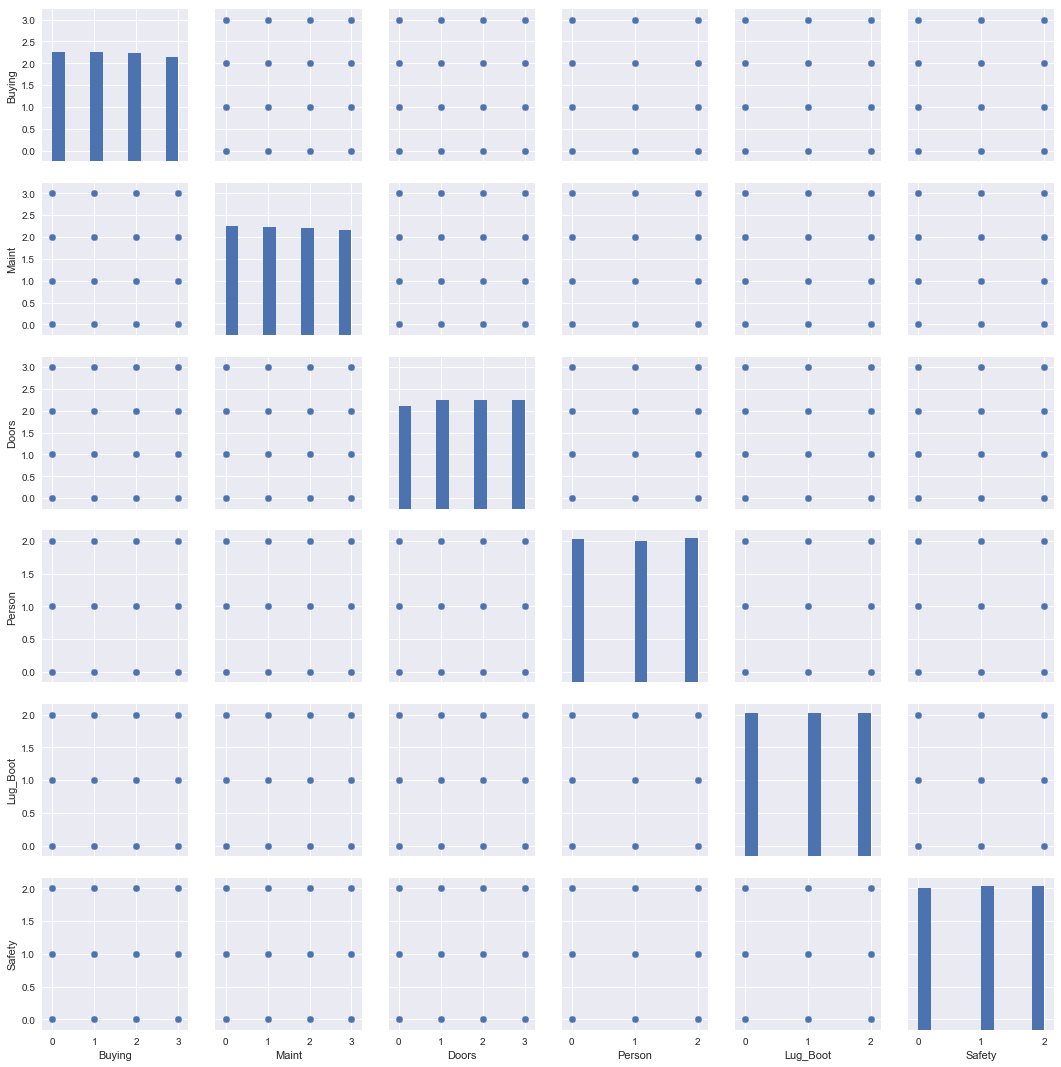

In [228]:
sns.pairplot(X_train)
plt.show()

By looking at the distrubtion of Training set, we can see that this is not a conitnious training set. Therefore we can futher assume that we need to used Multnomial Naive Bayes to perform the classification problem. 

### Perform Multinomial Naive Bayes method 

In [229]:
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

model  = MultinomialNB()
model.fit(X_train,y_train.values.ravel())
y_pred = model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.704
Accuracy on test set: 0.600


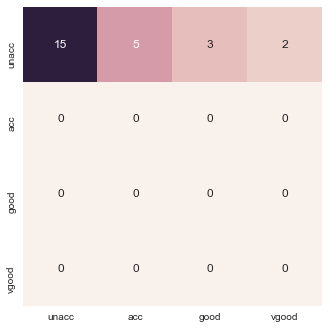

In [230]:
from sklearn.metrics import confusion_matrix
import numpy as np
labels = ['unacc', 'acc', 'good', 'vgood'] 
mat = confusion_matrix(y_test, y_pred , labels = labels )
sns.heatmap(mat.T, square = True , annot = True, fmt = 'd' , cbar = False,
            xticklabels = labels, yticklabels = labels  )

plt.show()

The accuracy of fitting the multinomial model is around 60% for the test case. This is good, however since there are more samples of 'unacc' in test set, the bias is high for this case, therefore resulting in more 'unacc' cassses.

## Problem 2: UCI Car dataset (Decision Tree Classification)

Method: gini
Accuracy on training set: 1.000
Accuracy on test set: 0.440


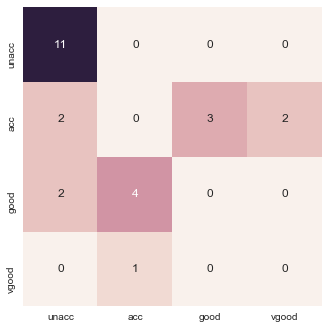

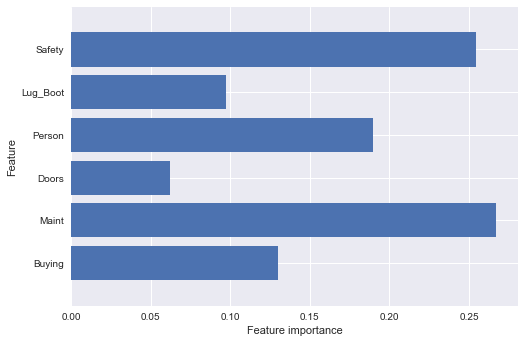

------------------------------------------------------------------------ 

Method: entropy
Accuracy on training set: 1.000
Accuracy on test set: 0.440


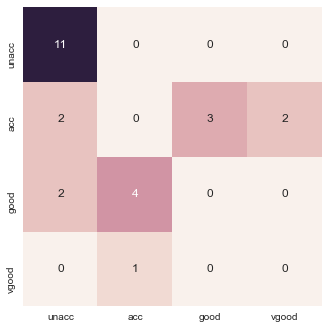

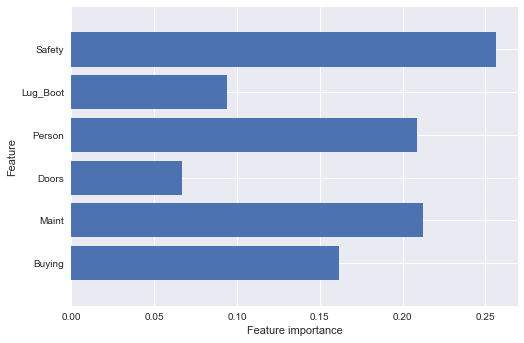

------------------------------------------------------------------------ 



In [231]:
from sklearn.tree import DecisionTreeClassifier

algo =['gini', 'entropy']

def plot_feature_importances(model):
    n_features = len(list(X_train))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(X_train))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

# for loop to try  both algorithms, gini and entropy     
for i in algo: 
    tree = DecisionTreeClassifier(criterion = i)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print("Method: " + i)
    print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
    mat = confusion_matrix(np.array(y_test), y_pred, labels = labels )
    sns.heatmap(mat.T, square = True , annot = True, fmt = 'd' , cbar = False,
            xticklabels = labels, yticklabels = labels  )
    plt.show()
    plot_feature_importances(tree)
    plt.show()
    print("------------------------------------------------------------------------ \n")

The results look similar, in the 'gini' method, Mainteneance is weighted more in the decsion tree. In the 'entropy' method, safety is weighted more. As we can see the model is overfitting for the training set, which is not good. In order to avoid overfitting, we will attempt to set the max depth value of the decision tree as an extra example. 

### Decision tree model by setting the max depth of the tree to 4
This way we do not over train the model and we can increase the score of the decision tree

Method: entropy
Accuracy on training set: 0.827
Accuracy on test set: 0.680


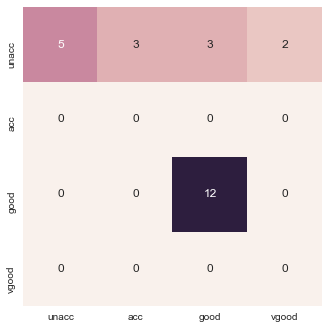

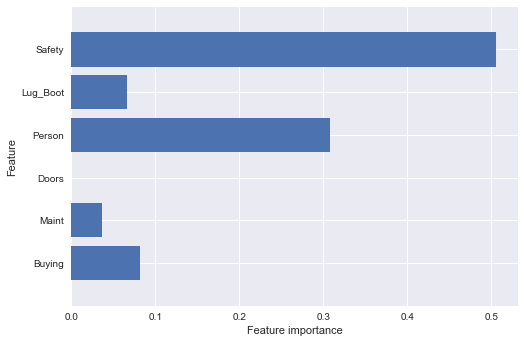

In [232]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Method: " + i)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
mat = confusion_matrix(np.array(y_test), y_pred) #, labels = labels )
sns.heatmap(mat.T, square = True , annot = True, fmt = 'd' , cbar = False,
        xticklabels = labels, yticklabels = labels  )
plt.show()
plot_feature_importances(tree)
plt.show()

We were able to create a tree vissualization. However, if you you dont have graphviz installed, you can go to the following website and pasted the contents of tree_TeamE.dot thats created in to the webite. The website will then populate the graphviz visualization.
http://www.webgraphviz.com/

In [233]:
from IPython.display import  display


export_graphviz(tree, out_file="tree_TeamE.dot", class_names= labels, 
                feature_names=list(X_train), impurity=False, filled=True)

# go to the following website:  http://www.webgraphviz.com/, paste the contents of the tree_TeamE.dot file


## Problem 3: Model Comparrison 

It looks like the decsion tree model predicts the data at a better score than that of the naive bayes model, if you set the max depth variable. In decsion trees it looks like the highest feature importance is Safety, followed by Person. The data could have been selected better in order to get a more meaningful result. The models mostly predicted UNACC, because in the test data there was mostly results for UNACC values. 